# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.770459e+01     1.811969e+01
 * time: 0.0014221668243408203
     1     3.496902e+01     8.798360e+00
 * time: 0.0038352012634277344
     2     2.344420e+01     3.780347e+00
 * time: 0.009896039962768555
     3     2.090460e+01     2.327774e+00
 * time: 0.014010190963745117
     4     1.977853e+01     2.149077e+00
 * time: 0.018795013427734375
     5     1.891426e+01     1.450052e+00
 * time: 0.022744178771972656
     6     1.851698e+01     7.763250e-01
 * time: 0.04986214637756348
     7     1.827770e+01     1.064348e+00
 * time: 0.05366015434265137
     8     1.814057e+01     5.951091e-01
 * time: 0.05734419822692871
     9     1.810443e+01     1.353533e+00
 * time: 0.060172080993652344
    10     1.804065e+01     6.622531e-01
 * time: 0.06365108489990234
    11     1.801055e+01     1.249129e+00
 * time: 0.06643915176391602
    12     1.791691e+01     8.240953e-01
 * time: 0.06920218467712402
    13     1.782745e+01     9.196910e-01

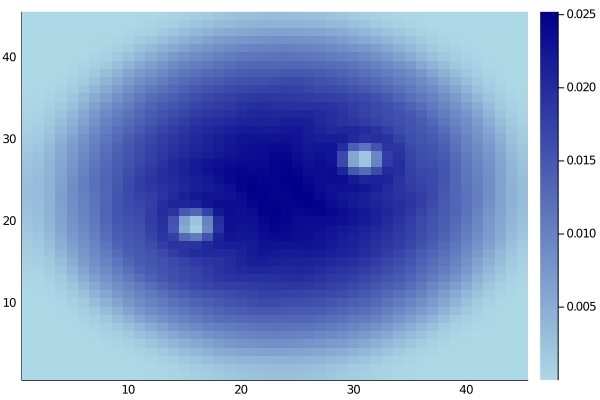

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)